In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [ ]:
df = pd.read_csv('../data/processed/all_kaggle_data.csv', low_memory=False)

print(f"Original dataset: {df.shape[0]:,} rows x {df.shape[1]} columns")
df.head()

Original dataset: 6,117 rows x 136 columns

First look at the data:


,unnamed_0,name,season,season_year,team,rating,goals,bigchancescreated,bigchancesmissed,assists,goalsassistssum,accuratepasses,inaccuratepasses,totalpasses,accuratepassespercentage,accurateownhalfpasses,accurateoppositionhalfpasses,accuratefinalthirdpasses,keypasses,successfuldribbles,successfuldribblespercentage,tackles,interceptions,yellowcards,directredcards,...,squad,mp,w,d,l,gf,ga,gd,pts,xg,xga,xgd,xgd90,last_5,attendance,top_team_scorer,goalkeeper,country,serial,player_name,club,position,corner_taken,dribbles,match_played
0,0.0,Robin van Persie,Champions League 13/14,13/14,manchester-united,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Ashley Cole,Champions League 13/14,13/14,chelsea,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,José Antonio Reyes,UEFA Champions League 15/16,15/16,sevilla,7.25,0.0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Roman Weidenfeller,Champions League 13/14,13/14,borussia-dortmund,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Roman Weidenfeller,Champions League 14/15,14/15,borussia-dortmund,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
missing_percent = (df.isnull().sum() / len(df)) * 100

cols_to_drop = missing_percent[missing_percent > 70].index.tolist()

print(f"Columns with >70% missing data: {len(cols_to_drop)}")
print(f"\nDropping these columns:")
for col in cols_to_drop:
    print(f"  - {col}: {missing_percent[col]:.1f}% missing")

df_clean = df.drop(columns=cols_to_drop)

print(f"\nNew dataset shape: {df_clean.shape[0]:,} rows x {df_clean.shape[1]} columns")

Columns with >70% missing data: 32

Dropping these columns:
  - shotsfrominsidethebox: 78.7% missing
  - shotsfromoutsidethebox: 78.7% missing
  - totwappearances: 80.5% missing
  - substitutionsin: 74.4% missing
  - substitutionsout: 74.4% missing
  - sn: 99.5% missing
  - rk: 99.5% missing
  - squad: 99.5% missing
  - mp: 99.5% missing
  - w: 99.5% missing
  - d: 99.5% missing
  - l: 99.5% missing
  - gf: 99.5% missing
  - ga: 99.5% missing
  - gd: 99.5% missing
  - pts: 99.5% missing
  - xg: 99.5% missing
  - xga: 99.5% missing
  - xgd: 99.5% missing
  - xgd90: 99.5% missing
  - last_5: 99.5% missing
  - attendance: 99.5% missing
  - top_team_scorer: 99.5% missing
  - goalkeeper: 99.5% missing
  - country: 99.5% missing
  - serial: 94.2% missing
  - player_name: 97.1% missing
  - club: 97.1% missing
  - position: 94.2% missing
  - corner_taken: 94.2% missing
  - dribbles: 94.2% missing
  - match_played: 97.1% missing

New dataset shape: 6,117 rows x 104 columns


In [ ]:
# Historical POTT winners
pott_winners = {
    '13/14': 'Cristiano Ronaldo',
    '14/15': 'Lionel Messi',
    '15/16': 'Cristiano Ronaldo',
    '16/17': 'Cristiano Ronaldo',
    '17/18': 'Luka Modrić',
    '18/19': 'Virgil van Dijk',
    '19/20': 'Robert Lewandowski',
    '20/21': 'Jorginho',
    '21/22': 'Karim Benzema',
    '22/23': 'Erling Haaland',
    '23/24': 'Vinicius Junior',
    '24/25': 'Ousmane Dembélé',
}

df_clean['is_winner'] = 0

for season, winner in pott_winners.items():
    mask = (df_clean['season_year'] == season) & (df_clean['name'].str.contains(winner, case=False, na=False))
    df_clean.loc[mask, 'is_winner'] = 1

winners_found = df_clean['is_winner'].sum()
print(df_clean['is_winner'].value_counts())

print(f"\nPOTT Winners in our dataset:")
df_clean[df_clean['is_winner'] == 1][['name', 'season_year', 'team', 'goals', 'assists', 'rating']]

✓ Target variable created!
✓ Found 8 POTT winner records in dataset

Class distribution:
is_winner
0    6109
1       8
Name: count, dtype: int64

POTT Winners in our dataset:


,name,season_year,team,goals,assists,rating
72,Cristiano Ronaldo,13/14,juventus,17.0,2.0,NaN
74,Cristiano Ronaldo,15/16,juventus,16.0,4.0,8.116667
75,Cristiano Ronaldo,16/17,juventus,12.0,5.0,7.846154
697,Lionel Messi,14/15,barcelona,10.0,5.0,NaN
890,Luka Modrić,17/18,real-madrid,1.0,1.0,6.990909
2072,Robert Lewandowski,19/20,bayern-munchen,15.0,5.0,8.350000
3565,Jorginho,20/21,chelsea,0.0,0.0,6.633333
3884,Virgil van Dijk,18/19,liverpool,2.0,2.0,7.158333


Minutes played distribution:
count    5733.000000
mean      323.625676
std       251.248743
min         0.000000
25%       109.000000
50%       270.000000
75%       490.000000
max      1230.000000
Name: minutesplayed, dtype: float64


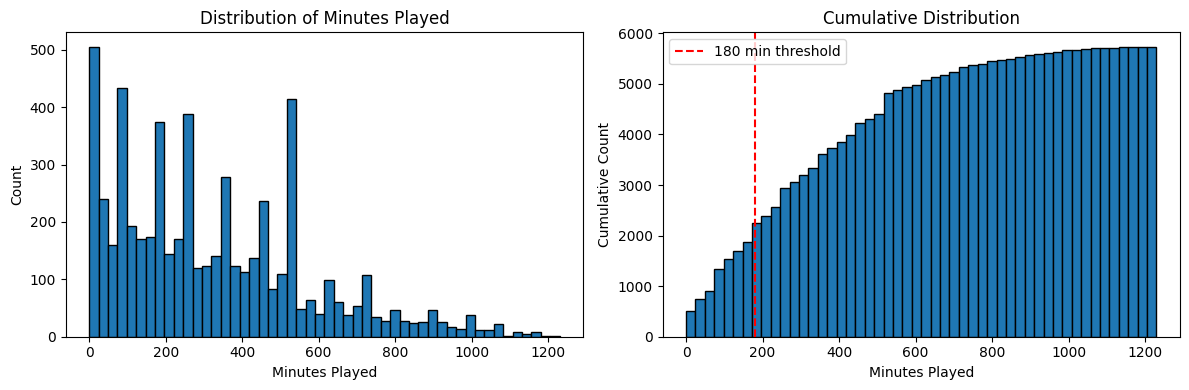


Filtered to players with >=180 minutes
Remaining: 3,804 rows (62.2% of original)
POTT winners retained: 8


In [46]:
print("Minutes played distribution:")
print(df_clean['minutesplayed'].describe())

# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_clean['minutesplayed'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.title('Distribution of Minutes Played')

plt.subplot(1, 2, 2)
plt.hist(df_clean['minutesplayed'].dropna(), bins=50, edgecolor='black', cumulative=True)
plt.xlabel('Minutes Played')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Distribution')
plt.axvline(x=180, color='red', linestyle='--', label='180 min threshold')
plt.legend()

plt.tight_layout()
plt.show()

MIN_MINUTES = 180
df_filtered = df_clean[df_clean['minutesplayed'] >= MIN_MINUTES].copy()

print(f"\nFiltered to players with >={MIN_MINUTES} minutes")
print(f"Remaining: {df_filtered.shape[0]:,} rows ({df_filtered.shape[0]/df_clean.shape[0]*100:.1f}% of original)")
print(f"POTT winners retained: {df_filtered['is_winner'].sum()}")

In [37]:
df_filtered['goals_per_90'] = (df_filtered['goals'] / df_filtered['minutesplayed']) * 90
df_filtered['assists_per_90'] = (df_filtered['assists'] / df_filtered['minutesplayed']) * 90
df_filtered['shots_per_90'] = (df_filtered['totalshots'] / df_filtered['minutesplayed']) * 90
df_filtered['keypasses_per_90'] = (df_filtered['keypasses'] / df_filtered['minutesplayed']) * 90
df_filtered['dribbles_per_90'] = (df_filtered['successfuldribbles'] / df_filtered['minutesplayed']) * 90

df_filtered['goal_contributions'] = df_filtered['goals'].fillna(0) + df_filtered['assists'].fillna(0)
df_filtered['goal_contributions_per_90'] = (df_filtered['goal_contributions'] / df_filtered['minutesplayed']) * 90

df_filtered['shot_accuracy'] = df_filtered['shotsontarget'] / df_filtered['totalshots']
df_filtered['shot_accuracy'] = df_filtered['shot_accuracy'].fillna(0)

if 'accuratepassespercentage' not in df_filtered.columns:
    df_filtered['pass_completion_rate'] = df_filtered['accuratepasses'] / df_filtered['totalpasses']
else:
    df_filtered['pass_completion_rate'] = df_filtered['accuratepassespercentage'] / 100

if 'successfuldribblespercentage' in df_filtered.columns:
    df_filtered['dribble_success_rate'] = df_filtered['successfuldribblespercentage'] / 100

df_filtered['defensive_actions'] = df_filtered['tackles'].fillna(0) + df_filtered['interceptions'].fillna(0)
df_filtered['defensive_actions_per_90'] = (df_filtered['defensive_actions'] / df_filtered['minutesplayed']) * 90

print(df_filtered[['name', 'goals', 'goals_per_90', 'goal_contributions', 'goal_contributions_per_90', 'shot_accuracy']].head(10))

                  name  goals  goals_per_90  goal_contributions  \
1          Ashley Cole    0.0      0.000000                 0.0   
3   Roman Weidenfeller    0.0      0.000000                 0.0   
4   Roman Weidenfeller    0.0      0.000000                 0.0   
5   Roman Weidenfeller    0.0      0.000000                 0.0   
7       Sebastian Kehl    1.0      0.213270                 1.0   
8       Sebastian Kehl    0.0      0.000000                 1.0   
9       Daniel Braaten    1.0      0.272727                 1.0   
12    Manuel Friedrich    0.0      0.000000                 0.0   
13   Daniel van Buyten    0.0      0.000000                 0.0   
15      Hamit Altintop    0.0      0.000000                 0.0   

    goal_contributions_per_90  shot_accuracy  
1                    0.000000            0.0  
3                    0.000000            0.0  
4                    0.000000            0.0  
5                    0.000000            0.0  
7                    0.2132

In [38]:
remaining_missing = df_filtered.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

print(f"Columns still with missing values: {len(remaining_missing)}")
print(f"\nTop 10 columns with missing data:")
print(remaining_missing.head(10))

numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_filtered[col].isnull().sum() > 0:
        df_filtered[col] = df_filtered[col].fillna(0)

categorical_cols = df_filtered.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_filtered[col].isnull().sum() > 0:
        df_filtered[col] = df_filtered[col].fillna('Unknown')

print(f"Remaining missing values: {df_filtered.isnull().sum().sum()}")

Columns still with missing values: 95

Top 10 columns with missing data:
tackleswonpercentage     2563
accuratechippedpasses    2520
possessionwonattthird    2520
tackleswon               2520
possessionlost           2021
totalchippedpasses       1982
touches                  1982
scoringfrequency         1956
directredcards           1902
totalownhalfpasses       1042
dtype: int64
Remaining missing values: 0


In [ ]:
print(f"\nShape: {df_filtered.shape[0]:,} rows x {df_filtered.shape[1]} columns")
print(f"\nTarget variable distribution:")
print(df_filtered['is_winner'].value_counts())
print(f"\nClass imbalance ratio: {(df_filtered['is_winner']==0).sum()} : {(df_filtered['is_winner']==1).sum()}")

print(f"\nKey statistics for winners vs non-winners:")
comparison_stats = ['goals', 'assists', 'rating', 'goal_contributions', 'goals_per_90', 'shot_accuracy']
existing_comparison = [col for col in comparison_stats if col in df_filtered.columns]

print(df_filtered.groupby('is_winner')[existing_comparison].mean())

FINAL DATASET SUMMARY

Shape: 3,804 rows x 117 columns

Target variable distribution:
is_winner
0    3796
1       8
Name: count, dtype: int64

Class imbalance ratio: 3796 : 8

Key statistics for winners vs non-winners:
              goals   assists    rating  goal_contributions  goals_per_90  \
is_winner                                                                   
0          0.650948  0.440464  5.007927            1.091412      0.122840   
1          9.125000  3.000000  5.636925           12.125000      0.788325   

           shot_accuracy  
is_winner                 
0               0.245944  
1               0.374098  


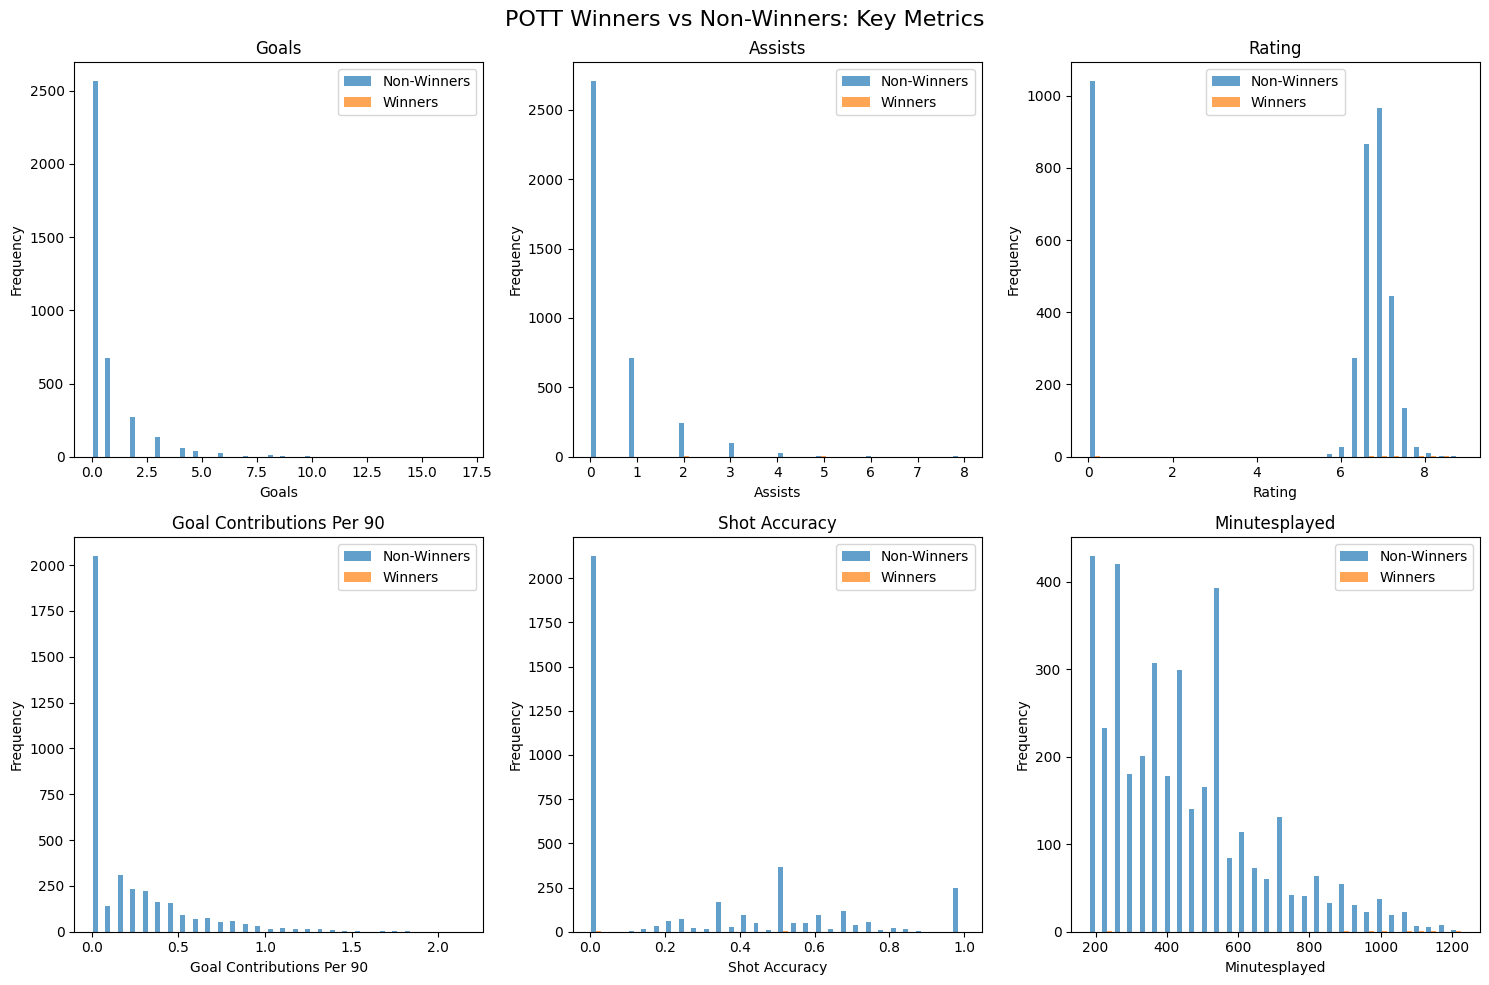

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('POTT Winners vs Non-Winners: Key Metrics', fontsize=16)

metrics = ['goals', 'assists', 'rating', 'goal_contributions_per_90', 'shot_accuracy', 'minutesplayed']

for idx, metric in enumerate(metrics):
    if metric in df_filtered.columns:
        ax = axes[idx // 3, idx % 3]
        
        winners = df_filtered[df_filtered['is_winner'] == 1][metric].dropna()
        non_winners = df_filtered[df_filtered['is_winner'] == 0][metric].dropna()
        
        ax.hist([non_winners, winners], bins=30, label=['Non-Winners', 'Winners'], alpha=0.7)
        ax.set_xlabel(metric.replace('_', ' ').title())
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.set_title(f'{metric.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

In [41]:
output_path = '../data/processed/cleaned_features.csv'
df_filtered.to_csv(output_path, index=False)